In [23]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as matplt
%matplotlib inline

In [24]:
#setting rootdirectory path 
rootdir = '/usr/bin/MachineLearning/WestNileVirusPrediction/'
#reading training.csv into train_dataframe
train_dataframe = pd.read_csv(rootdir+"train.csv")

#Bringing Target WnvPresent Column as 1st column in the dataframe
train_columns = train_dataframe.columns.tolist()
train_columns = train_columns[-1:] + train_columns[:-1]
train_dataframe = train_dataframe[train_columns]



#reading test.csv into train_dataframe
test_dataframe = pd.read_csv(rootdir+"test.csv")



In [25]:
train_dataframe.dtypes

WnvPresent                  int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
dtype: object

In [26]:
test_dataframe.dtypes

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

In [27]:
#dropping un-necessary columns from training and test dataframe
train_dataframe = train_dataframe.drop(['Date','Address','Block','AddressNumberAndStreet','AddressAccuracy', 'NumMosquitos' ],1)
test_dataframe = test_dataframe.drop(['Id','Date','Address','Block','AddressNumberAndStreet','AddressAccuracy'],1)


In [28]:
train_dataframe["Species"].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [29]:
test_dataframe["Species"].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [30]:
#test_dataframe.ix[test_dataframe["Species"]=='UNSPECIFIED CULEX'].Species = 'CULEX ERRATICUS'
test_dataframe.loc[test_dataframe.Species=='UNSPECIFIED CULEX','Species'] = 'CULEX ERRATICUS'

In [31]:
test_dataframe[test_dataframe["Species"]=='UNSPECIFIED CULEX'] 

,Species,Street,Trap,Latitude,Longitude


In [33]:
#Converting TrainFrame categorical variables to dummy variables
train_Street_dummies = pd.get_dummies(train_dataframe['Street'], prefix='Street')
train_Street_dummies = train_Street_dummies.drop(train_Street_dummies.columns[0],axis = 1)
train_dataframe= train_dataframe.drop('Street',1)
train_dataframe = train_dataframe.join(train_Street_dummies.ix[:,:])

train_Trap_dummies = pd.get_dummies(train_dataframe['Trap'], prefix='Trap')
train_Trap_dummies = train_Trap_dummies.drop(train_Trap_dummies.columns[0],axis = 1)
train_dataframe= train_dataframe.drop('Trap',1)
train_dataframe = train_dataframe.join(train_Trap_dummies.ix[:,:])

train_Species_dummies = pd.get_dummies(train_dataframe['Species'], prefix='Species')
train_Species_dummies = train_Species_dummies.drop(train_Species_dummies.columns[0],axis = 1)
train_dataframe= train_dataframe.drop('Species',1)
train_dataframe = train_dataframe.join(train_Species_dummies.ix[:,:])



 




In [34]:
#Converting TestFrame categorical variables to dummy variables
test_Street_dummies = pd.get_dummies(test_dataframe['Street'], prefix='Street')
test_Street_dummies = test_Street_dummies.drop(test_Street_dummies.columns[0],axis = 1)
test_dataframe= test_dataframe.drop('Street',1)
test_dataframe = test_dataframe.join(test_Street_dummies.ix[:,:])

test_Trap_dummies = pd.get_dummies(test_dataframe['Trap'], prefix='Trap')
test_Trap_dummies = test_Trap_dummies.drop(test_Trap_dummies.columns[0],axis = 1)
test_dataframe= test_dataframe.drop('Trap',1)
test_dataframe = test_dataframe.join(test_Trap_dummies.ix[:,:])

test_Species_dummies = pd.get_dummies(test_dataframe['Species'], prefix='Species')
test_Species_dummies = test_Species_dummies.drop(test_Species_dummies.columns[0],axis = 1)
test_dataframe= test_dataframe.drop('Species',1)
test_dataframe = test_dataframe.join(test_Species_dummies.ix[:,:])




In [40]:
train_column_names_set = set(list(train_dataframe.columns.values))
test_column_names_set = set(list(test_dataframe.columns.values))

train_columns_notin_test = train_column_names_set - test_column_names_set
test_columns_notin_train = test_column_names_set - train_column_names_set


In [41]:
test_columns_notin_train

set()

In [37]:
train_dataframe['Street_ E 136TH ST'] = 0
train_dataframe['Street_ N KENNETH AVE']= 0
train_dataframe['Street_ N KILBOURN AVE'] = 0
train_dataframe['Street_ N MELVINA AVE'] = 0
train_dataframe['Street_ S BALTIMORE AVE'] = 0
train_dataframe['Street_ S LOOMIS ST'] = 0
train_dataframe['Street_ S OGLESBY AVE'] = 0
train_dataframe['Street_ W 112TH ST'] = 0
train_dataframe['Street_ W 120TH ST'] = 0
train_dataframe['Street_ W 63RD PL'] = 0
train_dataframe['Street_ W DAKIN ST'] = 0
train_dataframe['Trap_T002A'] = 0
train_dataframe['Trap_T002B'] = 0
train_dataframe['Trap_T065A'] = 0
train_dataframe['Trap_T090A'] = 0
train_dataframe['Trap_T090B'] = 0
train_dataframe['Trap_T090C'] = 0
train_dataframe['Trap_T128A'] = 0
train_dataframe['Trap_T200A'] = 0
train_dataframe['Trap_T200B'] = 0
train_dataframe['Trap_T218A'] = 0
train_dataframe['Trap_T218B'] = 0
train_dataframe['Trap_T218C'] = 0
train_dataframe['Trap_T234']=0

In [42]:
train_array = train_dataframe.values
test_array = test_dataframe.values

In [43]:
from sklearn import ensemble
import numpy
clf_et=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1)
clf_et.fit(train_array[0::,1::],train_array[0::,0::])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

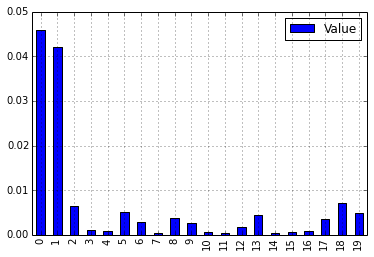

In [44]:
feature_importance_list = list(zip(clf_et.feature_importances_,list(train_array)))
feature_importance_frame = pd.DataFrame(feature_importance_list,columns=['Value','ColumnName'])

feature_importance_frame.sort(columns='Value',ascending=False)
feature_importance_frame.head(20).plot(kind='bar')



In [ ]:
test_predict = clf_et.predict(test_array)

